<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch14_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#이미지 컨볼루션

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from scipy.misc import face

In [0]:
# For reproducibility
np.random.seed(1000)

In [0]:
# Load the image
img = face(gray=True)

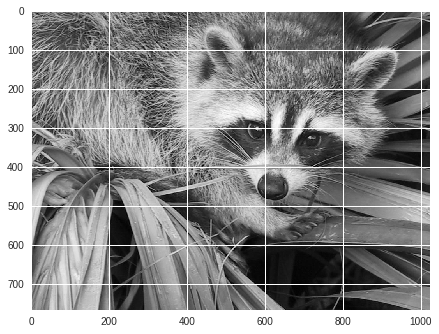

In [89]:
# Show the original image
plt.imshow(img, cmap='gray')
plt.show()

In [0]:
# Define the kernel
kernel = np.array(
    [[0, 1, 0],
     [1, -4, 0],
     [0, 1, 0]],
    dtype=np.float32)

cfilter = np.zeros((3, 3, 1, 1), dtype=np.float32)
cfilter[:, :, 0, 0] = kernel

In [91]:
# Create the graph
graph = tf.Graph()

with graph.as_default():
    x = tf.placeholder(tf.float32, shape=(None, 768, 1024, 1), name='image')
    f = tf.constant(cfilter)

    y = tf.nn.conv2d(x, f, strides=[1, 1, 1, 1], padding='SAME')

session = tf.InteractiveSession(graph=graph)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
# Compute the convolution
c_img = session.run([y], feed_dict={x: img.reshape((1, 768, 1024, 1))})
n_img = np.array(c_img).reshape((768, 1024))

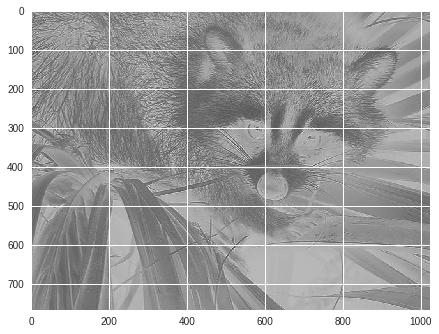

In [93]:
# Show the final image
plt.imshow(n_img, cmap='gray')
plt.show()